#### Trabajo de simulación 3

Para el último trabajo de simulación, vamos a hacer un análisis de datos a partir de la encuesta de salarios de Sysarmy del segundo trimestre de 2023.

Los datos oficiales se encuentran [acá](https://docs.google.com/spreadsheets/d/1-59q6epgnkOKnFsyi3uOrC72pTMJz60fvmAOvnxP-no/edit#gid=1719689619). Por si en algún momento el enlace se cae o cambia de ubicación, una versión descargada el 6 de agosto de 2023 puede encontrarse [acá](https://docs.google.com/spreadsheets/d/15FZw8C6aAnzNl1K1dA5t7SlNKclD0j3_/edit?usp=sharing&ouid=104217074840737622126&rtpof=true&sd=true).

Las consignas de este trabajo no son tan dirigidas como las de los trabajos anteriores, pues en el análisis de datos, siempre hay libertad y margen para la creatividad y la producción personal. Sin embargo, les compartimos algunas pautas de lo que debe tener, como mínimo, este trabajo.

Pautas generales y **OBLIGATORIAS** para la aprobación de la entrega:

*   Debe replicarse, como mínimo, un análisis similar al aquí presentado para los datos del 2020.
*   Debe escribirse en formato "informe", es decir, no se trata de exhibir código y gráficos, sino de explicar qué se observa y por qué es relevante observar eso. El informe es requisito **excluyente**. No se aprueba el trabajo de simulación sin él. Este informe puede incluirse en el mismo notebook SIEMPRE Y CUANDO tenga la estructura de un informe (**NO** código comentado), o puede entregarse en un word/pdf adicional.
*   El trabajo debe contener, como mínimo, **una conjetura que sea sometida a prueba y de la que se exhiba alguna conclusión fundamentada**, como se hizo en el caso de los datos de 2020 para el salario medio bruto por género y para hombres y mujeres con nivel universitario completo. Por ejemplo, frente a la pregunta de si el salario medio de mujeres y hombres es igual, podríamos poner en práctica lo que estudiamos en las postas 4 y 5 para, de alguna forma, darnos una idea de cuán probable es observar lo que efectivamente estamos observando. Este es un "coqueteo" con la estadística inferencial, que no estudiamos formalmente en la materia, pero que es válido comenzar a encarar con todo lo que hemos estudiado.

El resto de la producción queda a criterio de los grupos. Esperamos que haya un interés genuino en tratar de extraer información a partir de estos datos. No solo por el desafío intelectual que representa, sino porque, además, se tratan de datos que pueden servirles a ustedes para la toma de decisiones profesionales sobre su incorporación al mundo IT. ¡Muchos éxitos!

#### Análisis y visualización de datos

Vamos a hacer un análisis de datos a partir de la encuesta de salarios de Sysarmy del segundo trimestre de 2023. 
Aquí tendremos algunas preguntas importantes para tratar de responder.
Por ejemplo:

* ¿Hay diferencias en el sueldo medio del mundo IT en función del nivel de estudio?
* ¿O del tipo de lenguaje usado con mayor frecuencia?
* ¿O entre géneros?
* ¿Con el mismo grado de estudio, por ejemplo TERCIARIO COMPLETO, a mayor años de experiencia el salario aumentará?

In [30]:
# Librerías necesarias
import io
import pandas as pd
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:.2f}'.format)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Guardamos los datos en un dataframe que se llamará df, aunque iremos reduciéndolo y filtrándolo según consideremos apropiado.

In [2]:
# Cargamos los datos de forma local y previsualizamos los 10 primeros datos.
df = pd.read_csv(r"Sysarmy 2023.csv")
df[0:10]

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,salir_o_seguir_contestando_sobre_estudios,tengo_edad,me_identifico_genero,sueldo_dolarizado,seniority,_sal
0,Argentina,Buenos Aires,Full-Time,Contractor,2000000.00,2000000.00,Cobro todo el salario en dólares,497,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,40,Hombre Cis,True,Senior,2000000.00
1,Argentina,Río Negro,Full-Time,Contractor,2133000.00,1919000.00,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Senior,2133000.00
2,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),485000.00,404000.00,Cobro parte del salario en dólares,NaN,Menos de un sueldo,Mix de las anteriores,...,Terminar encuesta,No,0.00,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,25,Hombre Cis,True,Semi-Senior,485000.00
3,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),942000.00,577000.00,Cobro parte del salario en dólares,230,3+ sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,34,Hombre Cis,True,Senior,942000.00
4,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),660000.00,380000.00,Mi sueldo está dolarizado (pero cobro en moned...,231,De uno a tres sueldos,Mix de las anteriores,...,Terminar encuesta,No,0.00,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,45,Hombre Cis,True,Senior,660000.00
5,Argentina,Buenos Aires,Full-Time,Contractor,1270000.00,1270000.00,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,24,Hombre Cis,True,Semi-Senior,1270000.00
6,Argentina,Córdoba,Full-Time,Staff (planta permanente),714071.00,474377.00,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Mix de las anteriores,...,Responder sobre guardias,No,0.00,Porcentaje de mi sueldo bruto,Terminar encuesta,28,Hombre Cis,True,Semi-Senior,714071.00
7,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),500000.00,315000.00,Cobro parte del salario en dólares,240,Menos de un sueldo,Mix de las anteriores,...,NaN,NaN,NaN,NaN,NaN,27,Hombre Cis,True,Semi-Senior,500000.00
8,Argentina,San Luis,Part-Time,Staff (planta permanente),385000.00,350000.00,Mi sueldo está dolarizado (pero cobro en moned...,Dólar mep,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,36,Hombre Cis,True,Senior,385000.00
9,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),648000.00,608000.00,Cobro parte del salario en dólares,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,27,Hombre Cis,True,Junior,648000.00


#### Exploración descriptiva inicial

Haremos una una exploración descriptiva inicial, por ejemplo para:

*   Reconocer los tipos de variables presentes.
*   En el caso de variables numéricas, tener una idea de los rangos de variación que tienen.
*   Identificar si hay datos faltantes o mal codificados.
*   Empezar a buscar relaciones de interés entre variables.
*   Hacer gráficos exploratorios.

Iniciaremos la fase de pre-procesamiento y limpieza de los datos para poder establecer algunas conjuteras sobre las hipótesis que surjan.

Comencemos por explorar la variable de maximo nivel de estudios disponible en `maximo_nivel_de_estudios`.

In [3]:
# Analizamos maximo nivel de estudios y vemos que hay muchos nulos
estudios = df['maximo_nivel_de_estudios'].value_counts(dropna=False)
estudios

maximo_nivel_de_estudios
NaN                         2965
Universitario               1648
Terciario                    413
Posgrado/Especialización     145
Secundario                   108
Maestría                     108
Doctorado                     27
Posdoctorado                   8
Name: count, dtype: int64

In [4]:
# Filtramos maximo nivel de estudio sacando los datos nulos
nivelDeEstudios_df = df.dropna(subset=['maximo_nivel_de_estudios'])
nivelDeEstudios_df

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,salir_o_seguir_contestando_sobre_estudios,tengo_edad,me_identifico_genero,sueldo_dolarizado,seniority,_sal
1,Argentina,Río Negro,Full-Time,Contractor,2133000.00,1919000.00,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Senior,2133000.00
2,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),485000.00,404000.00,Cobro parte del salario en dólares,NaN,Menos de un sueldo,Mix de las anteriores,...,Terminar encuesta,No,0.00,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,25,Hombre Cis,True,Semi-Senior,485000.00
4,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),660000.00,380000.00,Mi sueldo está dolarizado (pero cobro en moned...,231,De uno a tres sueldos,Mix de las anteriores,...,Terminar encuesta,No,0.00,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,45,Hombre Cis,True,Senior,660000.00
6,Argentina,Córdoba,Full-Time,Staff (planta permanente),714071.00,474377.00,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Mix de las anteriores,...,Responder sobre guardias,No,0.00,Porcentaje de mi sueldo bruto,Terminar encuesta,28,Hombre Cis,True,Semi-Senior,714071.00
10,Argentina,Buenos Aires,Full-Time,Freelance,180000.00,150000.00,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,NaN,30,Hombre Cis,True,Junior,180000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,Argentina,Santa Fe,Full-Time,Staff (planta permanente),92000.00,78000.00,NaN,NaN,No,No recibo bono,...,Responder sobre guardias,No,0.00,Neto,Terminar encuesta,22,Hombre Cis,False,Junior,92000.00
5412,Argentina,Mendoza,Full-Time,Staff (planta permanente),575000.00,445000.00,NaN,NaN,No,No recibo bono,...,Terminar encuesta,No,0.00,Neto,Responder sobre mis estudios,35,Hombre Cis,False,Semi-Senior,575000.00
5414,Argentina,Chubut,Full-Time,Freelance,700000.00,700000.00,NaN,NaN,No,No recibo bono,...,Responder sobre guardias,"Sí, pasiva",0.00,Porcentaje de mi sueldo bruto,Terminar encuesta,38,Hombre Cis,False,Senior,700000.00
5417,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),400000.00,380000.00,NaN,NaN,Menos de un sueldo,Performance individual,...,Terminar encuesta,NaN,NaN,NaN,NaN,25,Mujer Cis,False,Semi-Senior,400000.00


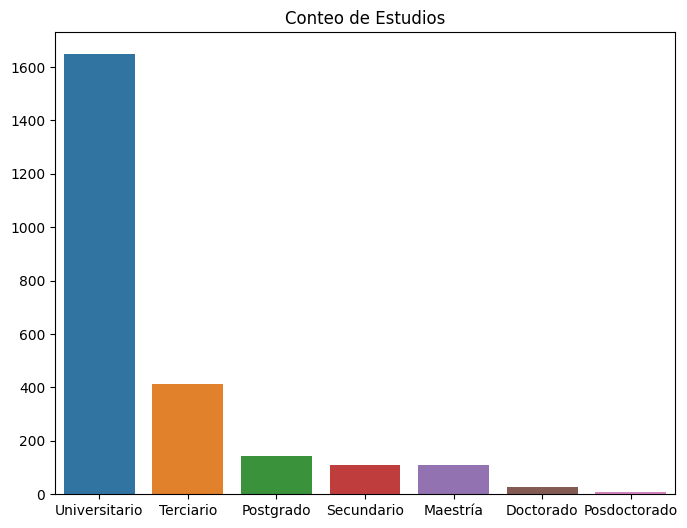

In [5]:
# Gráfico de barras para ver la relación entre nivel de estudio
df['maximo_nivel_de_estudios'] = df['maximo_nivel_de_estudios'].replace('Posgrado/Especialización', 'Postgrado')
estudiosCount = df['maximo_nivel_de_estudios'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=estudiosCount.index, y=estudiosCount.values)
plt.xlabel('')
plt.title('Conteo de Estudios');

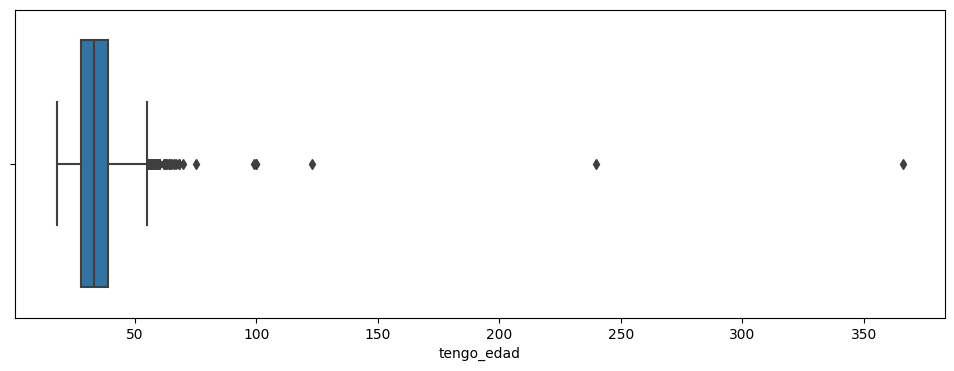

In [6]:
# Visualizamos que hay edades con más de 100 años
plt.figure(figsize=(12, 4))
sns.boxplot(x=df.tengo_edad ); 

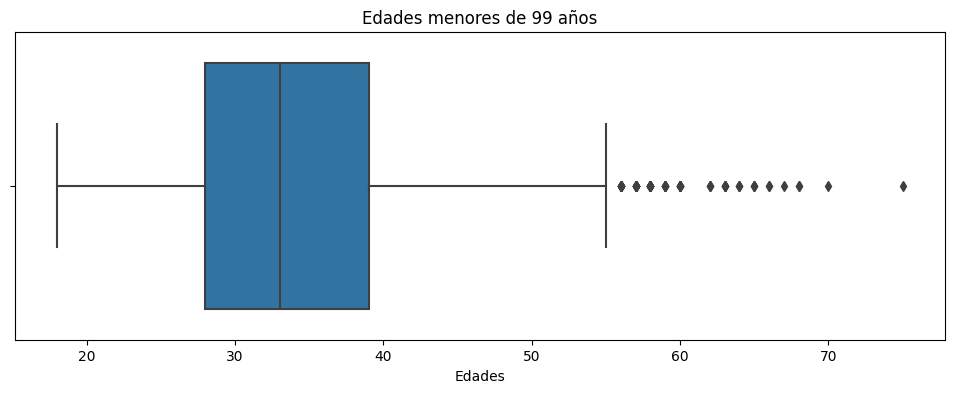

In [7]:
# Filtramos a registros de edades menores de 99 años
plt.figure(figsize=(12, 4))
edadFiltrada_df = df[df['tengo_edad'] < 99]
sns.boxplot(x=edadFiltrada_df.tengo_edad )
plt.xlabel('Edades')
plt.title('Edades menores de 99 años');

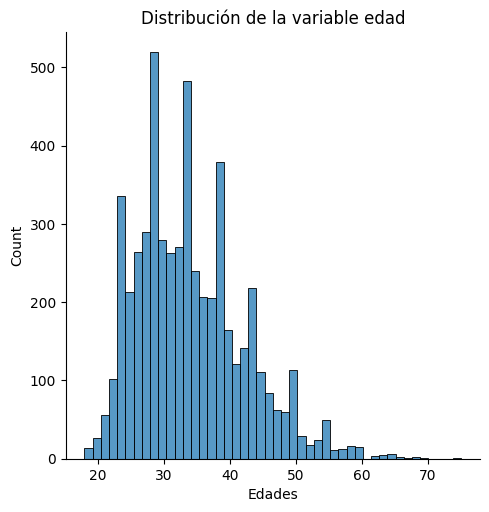

In [8]:
# Gráfico de distribución de la variable edad
sns.displot(edadFiltrada_df.tengo_edad)
plt.xlabel('Edades')
plt.title('Distribución de la variable edad');

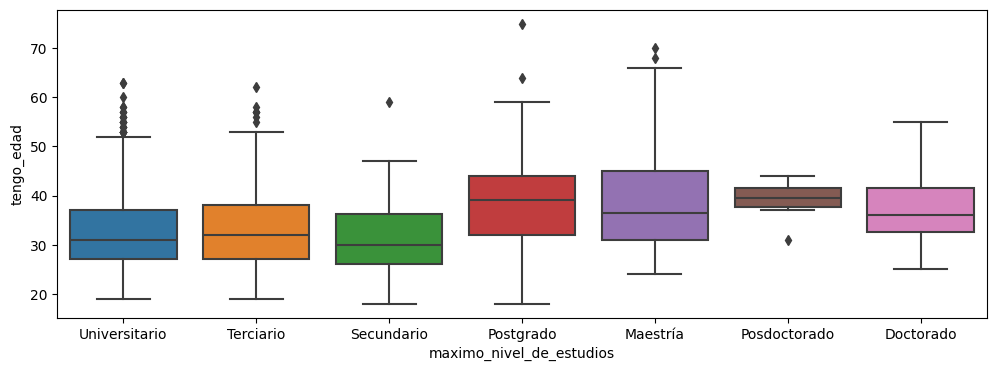

In [9]:
# Ahora comparamos el nivel de estudio por edades
plt.figure(figsize=(12, 4))
sns.boxplot(x='maximo_nivel_de_estudios', y='tengo_edad', data=edadFiltrada_df);

Analizamos ahora el salario mensual bruto disponible en ``_sal``

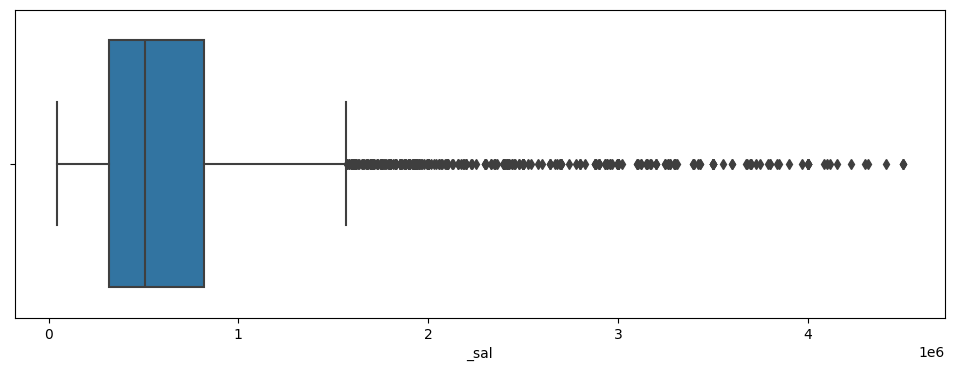

In [10]:
# Boxplot del salario
plt.figure(figsize=(12, 4))
sns.boxplot(x=df._sal);

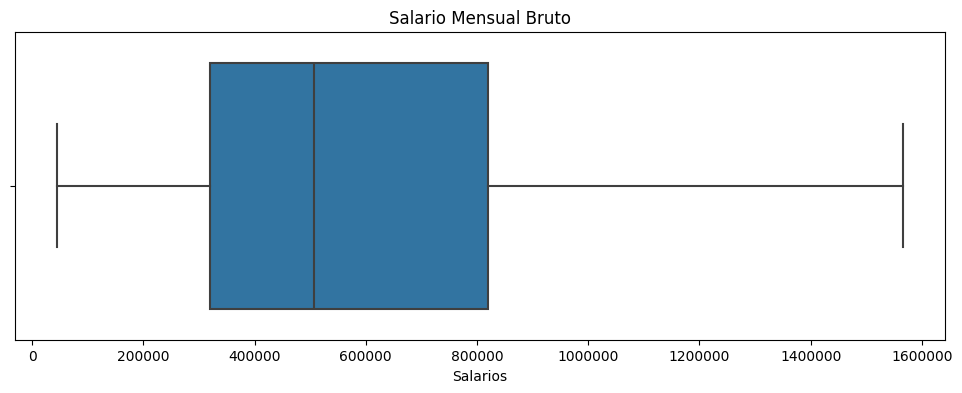

In [11]:
# Acá excluimos los outliers en el gráfico anterior
plt.figure(figsize=(12, 4))
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df._sal, showfliers = False)
plt.title('Salario Mensual Bruto')
plt.xlabel('Salarios');

Veamos un histograma del salario mensual bruto y representemos la media y la mediana. En el segundo gráfico, tomamos los datos filtrados para salarios de menos de $1.200.000.

Es usual que la distribución del salario presente asimetría. Esto se observa, además, con la media y la mediana: como el salario es asimétrico a derecha, hay mucha concentración a izquierda, mostrando una "cola" de la distribución larga a derecha, pero con poco peso. Por eso, la media se ve traccionada a la derecha, superando a la mediana, que se mantiene a izquierda.

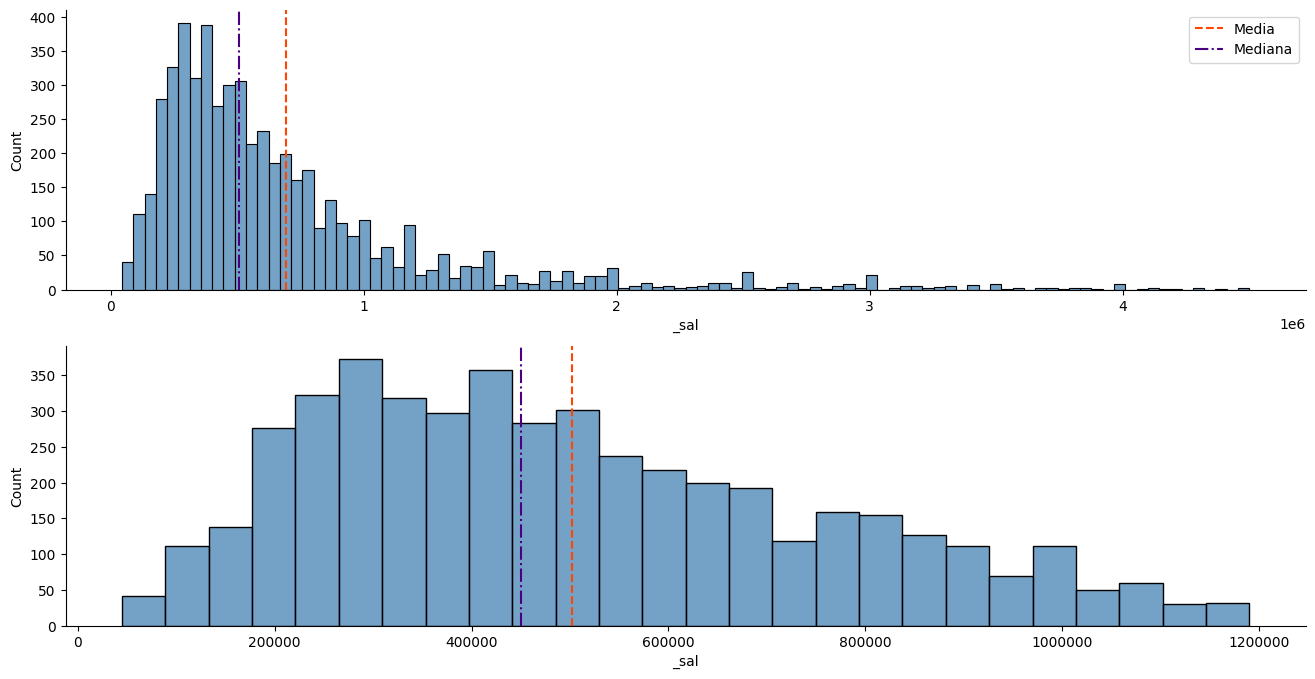

In [12]:
# Realizamos dos gráficos en uno.
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))

# Primer gráfico
sns.histplot(df['_sal'], bins=100, ax=axes[0], color='steelblue')
axes[0].axvline(df['_sal'].mean(), color='orangered', linestyle='--', label='Media')
axes[0].axvline(df['_sal'].median(), color='indigo',
            linestyle='-.', label='Mediana')

# Segundo gráfico, mismo histograma pero concentrando la visualización
# en la región de $0 a $1.200.000 (recordemos que el percentil 75 de estos datos
# es $900.000, es decir, en esta región estamos concentrando casi todos los datos)
sueldoFiltrado_df = df[df['_sal'] < 1200000]
sns.histplot(sueldoFiltrado_df['_sal'], ax=axes[1], color='steelblue')
axes[1].axvline(sueldoFiltrado_df['_sal'].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(sueldoFiltrado_df['_sal'].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
plt.ticklabel_format(style='plain', axis='x')
sns.despine()

También podemos comparar la distribución de los salarios brutos con respecto al nivel de estudios alcanzado o en curso. Eso es posible con boxplots apilados.

Los boxplots exhiben una tendencia creciente en función del incremento del nivel educativo
y, en general, mantienen la asimetría del salario sin filtrar por nivel.

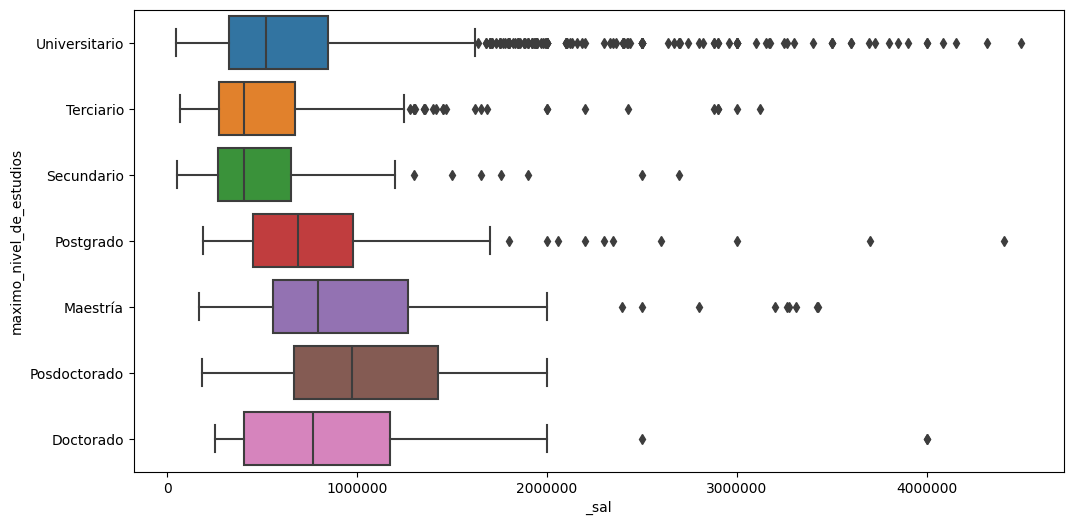

In [13]:
# Boxplots apilados del salario bruto mensual por nivel de estudios
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='_sal', y='maximo_nivel_de_estudios')
plt.ticklabel_format(style='plain', axis='x');

Veamos con más detalle que información hay en las colas. Para eso usaremos los boxenplots.

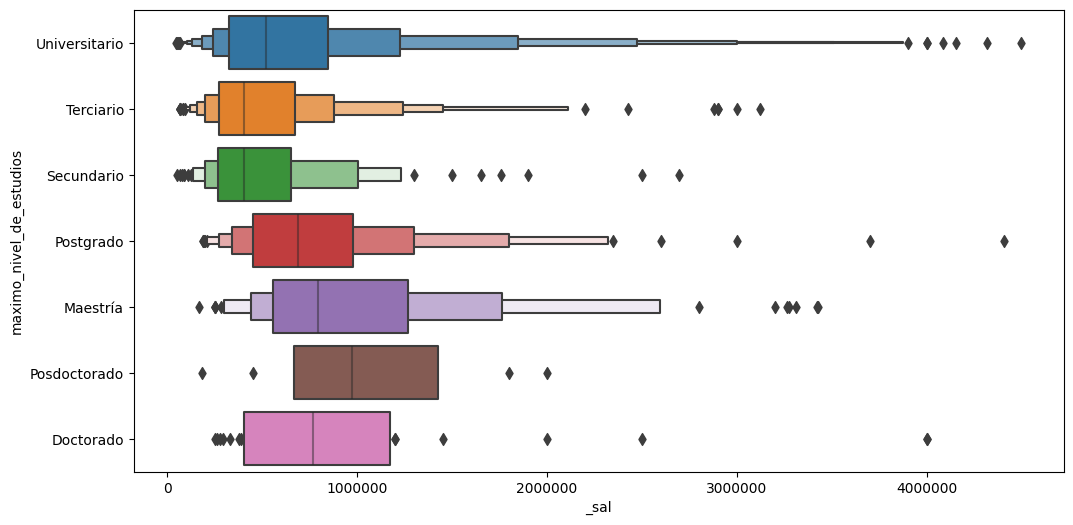

In [14]:
# Boxenplots apilados del salario bruto mensual por nivel de estudios
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x='_sal', y='maximo_nivel_de_estudios')
plt.ticklabel_format(style='plain', axis='x');

Tomamos la decisión de eliminar valores extremos que consideramos atípicos ya que obturarían mucho el cálculo de promedios.

Hay registros de usuarios que ganan más de 3.000.000 de pesos; una cifra, para ese entonces (2do trimestre de 2023) realmente llamativa. No podemos afirmar que casos como esos correspondan a errores de registro. Por esto decidimos excluirlo en aras de no sesgar estadísticos sensibles como la media o el desvío estándar

Elegimos quedarnos con el 98% de salarios más bajos, eliminando el 2% superior. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [15]:
# Algunos percentiles de interés
df['_sal'].quantile([.95, .98, .99, .998])

0.95   1900000.00
0.98   2880000.00
0.99   3275733.00
1.00   4013983.00
Name: _sal, dtype: float64

Así vemos que el 98% de los encuestados tienen un salario bruto de $2.880.000 o menos.

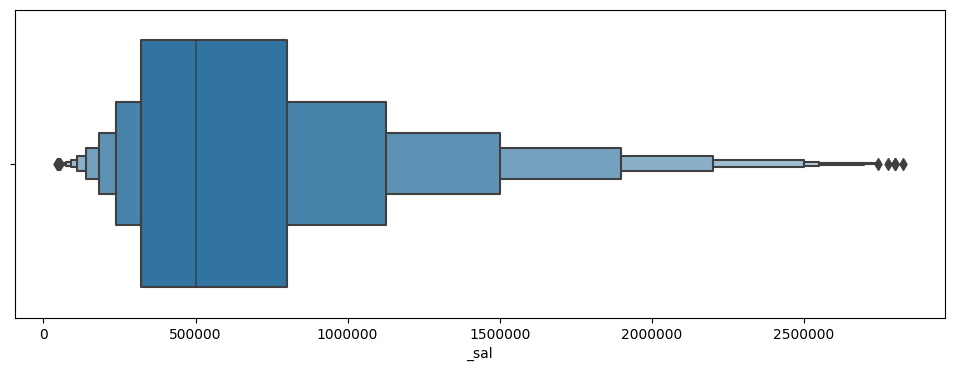

In [16]:
# Nos quedamos con los datos reducidos a ese nuevo conjunto
plt.figure(figsize=(12, 4))
sal_limit = df['_sal'].quantile(.98) # Definimos este límite a ojo
sns.boxenplot(x=df[df['_sal'] < sal_limit]['_sal'])
plt.ticklabel_format(style='plain', axis='x');

Creamos el dataset reducido df_red quedándonos con 5305 registros, que corresponden a los encuestados que concentran el 98% de los salarios brutos mensuales más bajos. Es decir, excluimos al 2% de mayores salarios de la base de datos original y, también a los de la edad superior a 100 años que observamos antes.

In [17]:
df_red = df[df['_sal'] < sal_limit]
df_red = df_red[df_red['tengo_edad'] < 99]
df_red

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,salir_o_seguir_contestando_sobre_estudios,tengo_edad,me_identifico_genero,sueldo_dolarizado,seniority,_sal
0,Argentina,Buenos Aires,Full-Time,Contractor,2000000.00,2000000.00,Cobro todo el salario en dólares,497,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,40,Hombre Cis,True,Senior,2000000.00
1,Argentina,Río Negro,Full-Time,Contractor,2133000.00,1919000.00,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Senior,2133000.00
2,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),485000.00,404000.00,Cobro parte del salario en dólares,NaN,Menos de un sueldo,Mix de las anteriores,...,Terminar encuesta,No,0.00,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,25,Hombre Cis,True,Semi-Senior,485000.00
3,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),942000.00,577000.00,Cobro parte del salario en dólares,230,3+ sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,34,Hombre Cis,True,Senior,942000.00
4,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),660000.00,380000.00,Mi sueldo está dolarizado (pero cobro en moned...,231,De uno a tres sueldos,Mix de las anteriores,...,Terminar encuesta,No,0.00,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,45,Hombre Cis,True,Senior,660000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),400000.00,380000.00,NaN,NaN,Menos de un sueldo,Performance individual,...,Terminar encuesta,NaN,NaN,NaN,NaN,25,Mujer Cis,False,Semi-Senior,400000.00
5418,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),361000.00,305000.00,NaN,NaN,Menos de un sueldo,Mix de las anteriores,...,Terminar encuesta,NaN,NaN,NaN,NaN,26,Hombre Cis,False,Semi-Senior,361000.00
5419,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,450000.00,380000.00,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,51,Hombre Cis,False,Senior,450000.00
5420,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,508000.00,400000.00,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,26,Hombre Cis,False,Semi-Senior,508000.00


In [18]:
df_red.describe()

,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,de_que_fue_el_ajuste_total_acumulado,como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior,que_tan_conforme_estas_con_tus_ingresos_laborales,anos_de_experiencia,antiguedad_en_la_empresa_actual,tiempo_en_el_puesto_actual,cuantas_personas_a_cargo_tenes,si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina,la_recomendas_como_un_buen_lugar_para_trabajar,que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo,cuanto_cobras_por_guardia,tengo_edad,_sal
count,5305.00,5106.00,5305.00,5305.00,5305.00,5305.00,5305.00,5305.00,5305.00,5305.00,5305.00,5305.00,1613.00,5305.00,5305.00
mean,638053.27,519400.95,53.88,2.60,2.59,7.70,3.40,2.40,2.30,0.72,6.62,1.91,3336.59,34.01,638053.27
std,466200.26,599962.34,987.10,0.81,0.85,7.38,4.84,3.21,9.11,1.18,2.78,1.61,18504.96,8.21,466200.26
min,45000.00,139.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00,45000.00
25%,320000.00,271250.00,10.00,2.00,2.00,2.00,1.00,1.00,0.00,0.00,5.00,0.00,0.00,28.00,320000.00
50%,500000.00,412000.00,25.00,3.00,3.00,5.00,2.00,2.00,0.00,0.00,7.00,2.00,0.00,33.00,500000.00
75%,800000.00,596297.00,40.00,3.00,3.00,11.00,4.00,3.00,1.00,1.00,8.00,3.00,0.00,39.00,800000.00
max,2824600.00,22296000.00,50000.00,4.00,4.00,46.00,93.00,30.00,230.00,5.00,10.00,5.00,300000.00,75.00,2824600.00


Volvemos a mirar la distribución del salario según el nivel de estudios alcanzado o en curso .


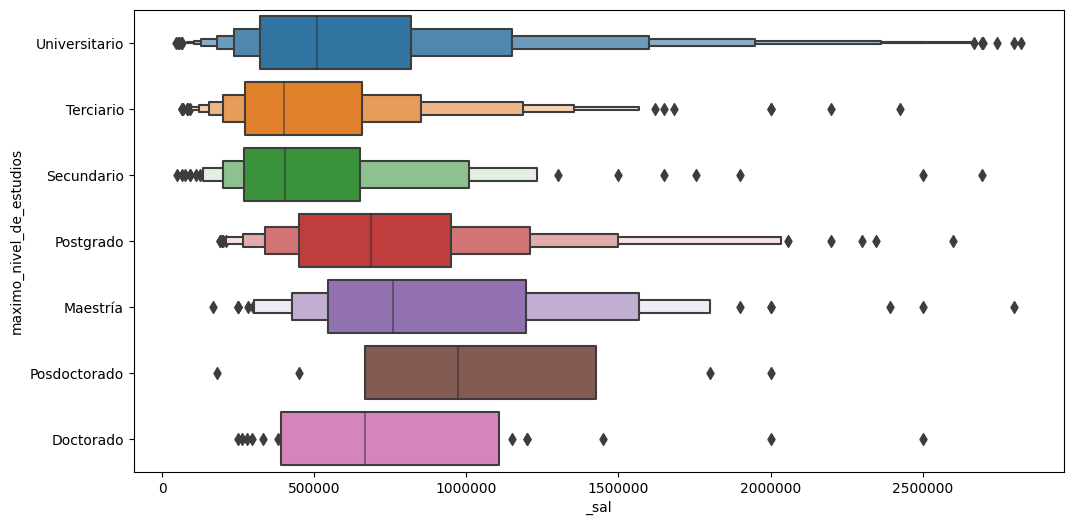

In [19]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_red, x='_sal', y='maximo_nivel_de_estudios')
plt.ticklabel_format(style='plain', axis='x');

Una tabla de contingencia permite ver, de forma desagregada, la cantidad de casos para el nivel de estudio según el seniority.

In [20]:
# Tabla de contingencia para ver nivel de estudios según seniority
pd.crosstab(df_red.seniority, df_red.maximo_nivel_de_estudios)#, normalize=True)

maximo_nivel_de_estudios,Doctorado,Maestría,Posdoctorado,Postgrado,Secundario,Terciario,Universitario
seniority,,,,,,,
Junior,7,14,1,21,39,148,524
Semi-Senior,6,22,1,34,24,91,442
Senior,12,66,6,87,45,169,646


Analizando el sueldo segun el seniority podemos ver que aumenta el salario segun el nivel de seniority.

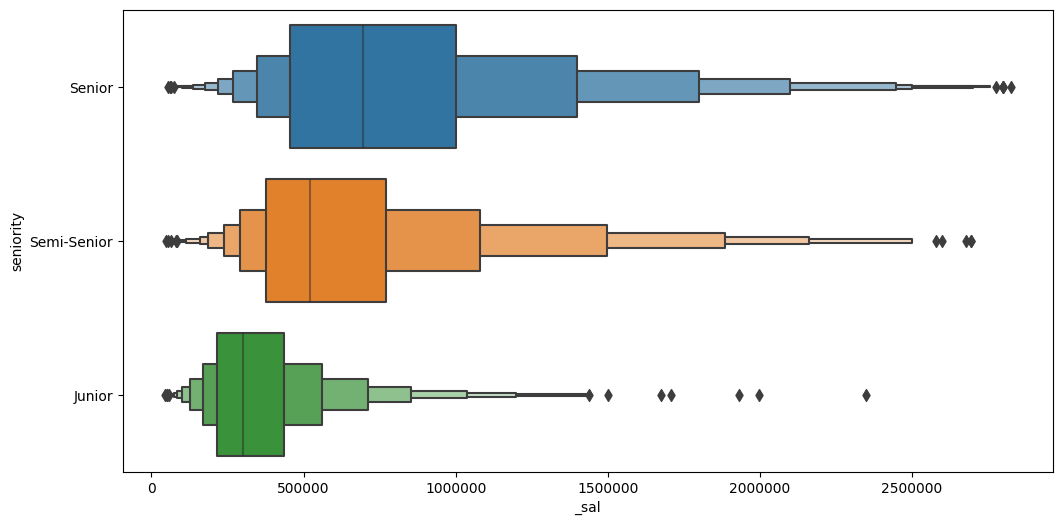

In [28]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_red, x='_sal', y='seniority')
plt.ticklabel_format(style='plain', axis='x');

Otra variable de interés son los años de experiencia, ya filtramos los datos de edad. Ahora nos falta la variable `anos_de_experiencia`.

Las barras verticales negras en este tipo de gráficos son conocidas como 'barras de error' y dan una idea de la precisión de la medición.

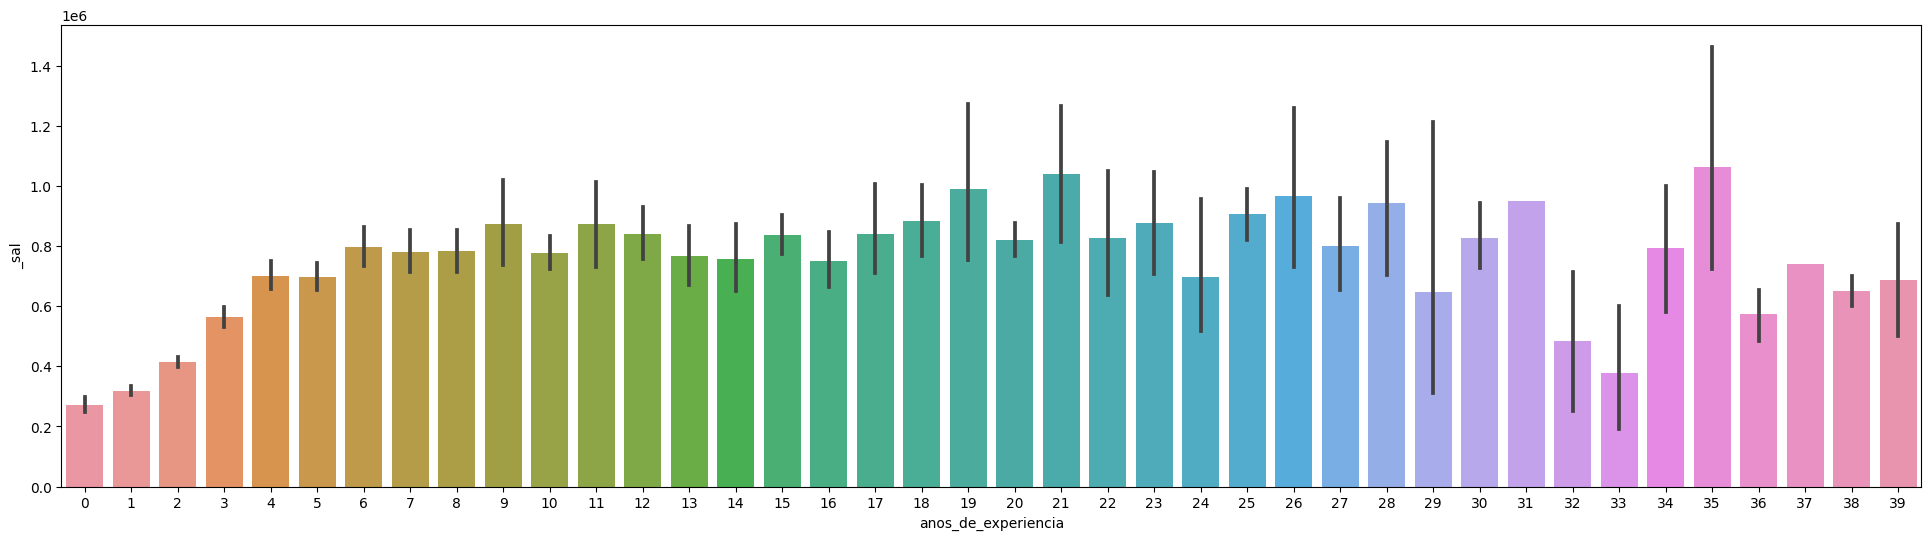

In [21]:
df_red = df_red[df_red['anos_de_experiencia'] < 40]
plt.figure(figsize=(24, 6))
sns.barplot(x='anos_de_experiencia', y='_sal', data=df_red);

También podemos relacionar esa variable con la de la edad de los individuos, viendo una tendencia creciente razonable. Este gráfico también puede ayudar a encontrar datos mal registrados: por ejemplo, una persona de menos de 30 años no debería tener mucho más de 10 años de experiencia.

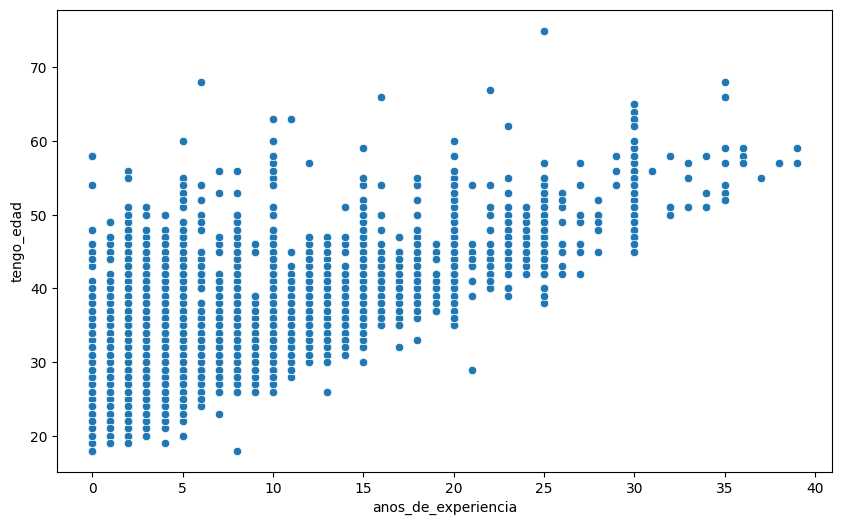

In [22]:
# Visualizamos que hay edades muy chicas con muchos años de experiencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='anos_de_experiencia', y='tengo_edad', data=df_red);

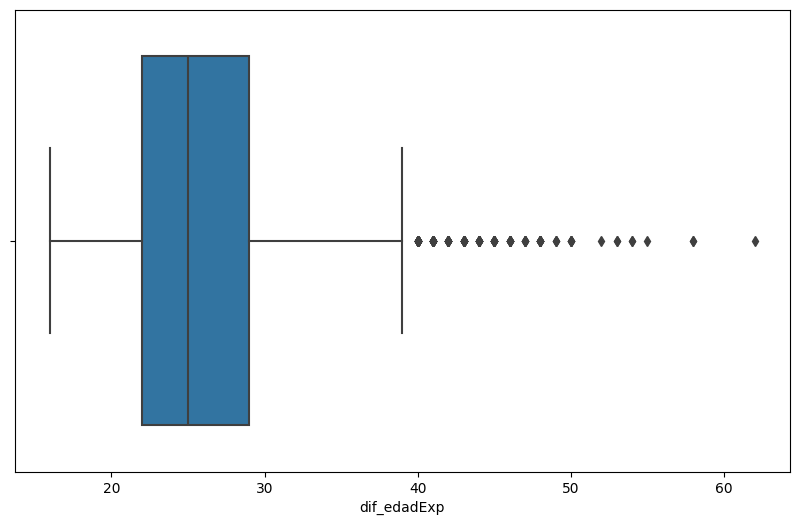

In [27]:
# Visualizamos que hay edades muy chicas con muchos años de experiencia
df_red.loc[:,'dif_edadExp'] = df_red['tengo_edad'] - df_red['anos_de_experiencia']
plt.figure(figsize=(10, 6))
sns.boxplot(x='dif_edadExp', data=df_red);

Podemos excluir, también, estos casos sospechosos suponiendo que la diferencia entre la edad y los años de experiencia debería ser, como mínimo, de 16 años.

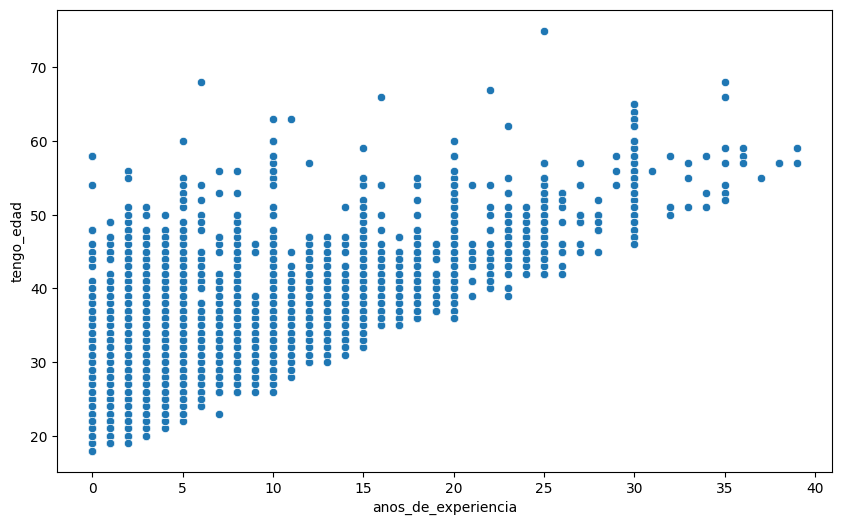

In [24]:
df_red = df_red[df_red['dif_edadExp'] > 15]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='anos_de_experiencia', y='tengo_edad', data=df_red);

También podemos relacionar los años de experiencia con el salario, así como la edad con el salario.

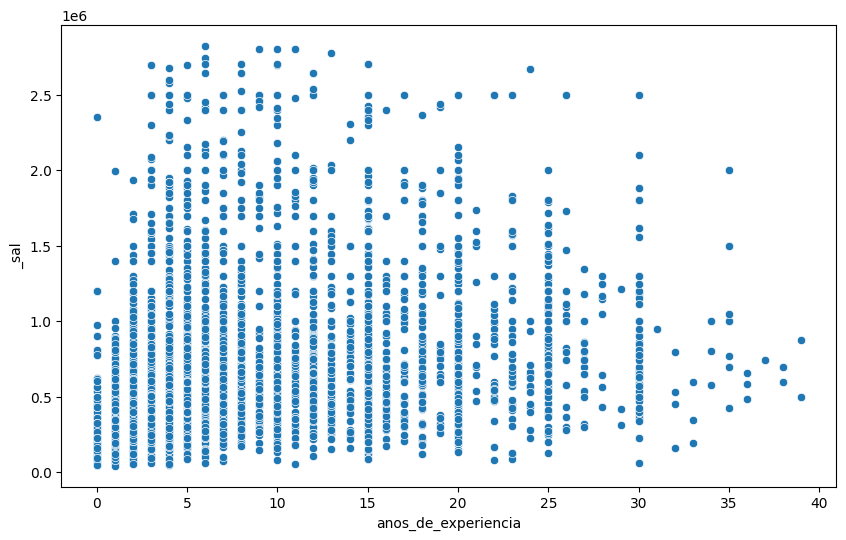

In [25]:
# Gráfico de dispersión de años de experiencia y salario
plt.figure(figsize=(10, 6))
sns.scatterplot(x='anos_de_experiencia', y='_sal', data=df_red);

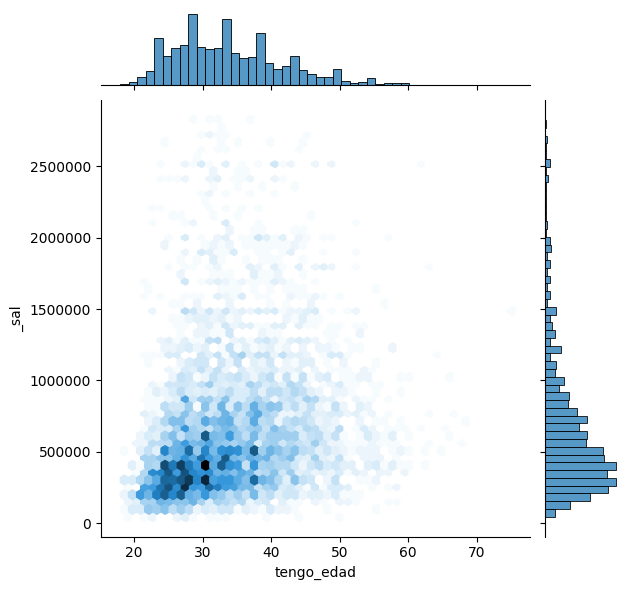

In [26]:
# Distribución conjunta de salario y edad
sns.jointplot(data=df_red, x='tengo_edad', y='_sal', kind='hex', height=6)
# Para remover la notación científica
plt.ticklabel_format(style='plain', axis='y');

#### Formulación de hipótesis

Luego de la exploración inicial, y del posible filtro que se haya hecho de los datos, es posible elaborar algunas conjeturas o hipótesis iniciales. Por ejemplo, hemos visto que el salario bruto mensual se ve muy influenciado por el nivel de estudios alcanzado y del nivel del seniority tambien.




El gráfico que sigue es una estimación de la densidad del salario bruto por seniority, que en el caso los de nivel Senior tiene una mayor asimetría que en los de menor nivel de seniority. Lo mismo ocurre con los Semi-Senior con respecto a los Juniors.

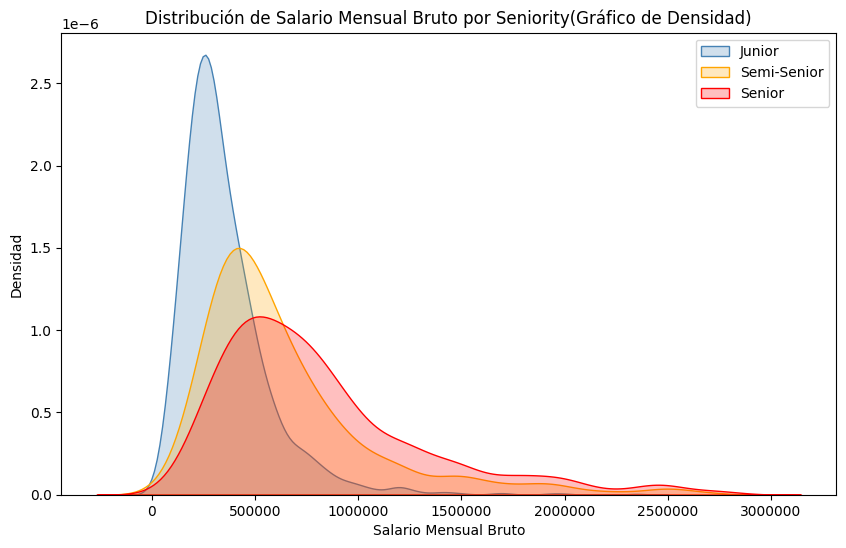

In [38]:
df_J = df_red[df_red['seniority']=='Junior']
df_SS = df_red[df_red['seniority']=='Semi-Senior']
df_S = df_red[df_red['seniority']=='Senior']

plt.figure(figsize=(10, 6))
sns.kdeplot(df_J['_sal'], color='steelblue', label='Junior', fill=True)
sns.kdeplot(df_SS['_sal'], color='orange', label='Semi-Senior', fill=True)
sns.kdeplot(df_S['_sal'], color='red', label='Senior', fill=True)

plt.title('Distribución de Salario Mensual Bruto por Seniority(Gráfico de Densidad)')
plt.xlabel('Salario Mensual Bruto')
plt.ylabel('Densidad')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

Algo similar ocurre con el nivel educativo.

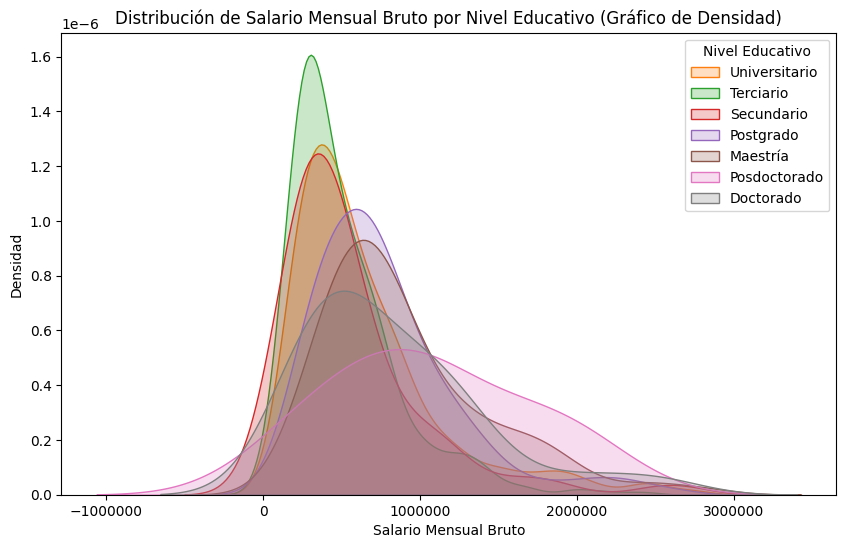

In [33]:
plt.figure(figsize=(10, 6)) 

# Filtra los datos por nivel educativo
education_levels = df_red['maximo_nivel_de_estudios'].unique()

for level in education_levels:
    df_subset = df_red[df_red['maximo_nivel_de_estudios'] == level]
    sns.kdeplot(df_subset['_sal'], label=level, fill=True)

plt.title('Distribución de Salario Mensual Bruto por Nivel Educativo (Gráfico de Densidad)')
plt.xlabel('Salario Mensual Bruto')
plt.ylabel('Densidad')
plt.legend(title='Nivel Educativo')
plt.ticklabel_format(style='plain', axis='x');
plt.show()

Podemos calcular un intervalo de confianza para la media de salario bruto mensual como sigue.

In [41]:
# Calcula la media y el error estándar estimado (S sobre sqrt n)
mean = df_red['_sal'].mean()
std_error = df_red['_sal'].std() / np.sqrt(len(df_red['_sal']))

# Calcula el valor crítico de la distribución normal estándar para el nivel de confianza
conf_level = 0.95
z = stats.norm.ppf((1 + conf_level) / 2)

# Calcula el intervalo de confianza
lower_bound = mean - z * std_error
upper_bound = mean + z * std_error

print(lower_bound)
print(upper_bound)

624999.4581883029
650140.6713551712


Con los datos de salarios en el dataset que hemos reducido, entonces, podríamos concluir que un intervalo de nivel $0.95$ para la media de salario bruto es aproximadamente

$$\left[624.999; 650.140\right].$$

Pero, cuidado, ¡este salario medio supone una única población! No está considerando que pudiera haber diferencias por seniority, por nivel educativo o por cualquier otra consideración.

Podríamos, por ejemplo, ver cómo son los intervalos de confianza para el salario medio de las poblaciones por seniority o por nivel educativo y usar esos resultados para ver si los intervalos se solapan o no. Si se solapan, sería difícil suponer que las medias verdaderas son distintas. Sin embargo, si no se solaparan, todo parecería indicar que no es razonable suponer que son iguales (pues, de serlo, uno esperaría obtener intervalos "similares" en ambas poblaciones).

##### Sueldo medio según `seniority`

Vamos a construir intervalos de confianza para las medias por seniority. Es decir, suponemos que hay tres medias
$$\mu_J, \quad \mu_SS, \quad \mu_S$$
donde la J ,SS y S corresponden al nivel de seniority: "Junior", "Semi-Senior" y "Senior" respectivamente.

Si las medias no fueran
$$\mu_J == \mu_SS \mu_S$$
uno esperaría que los intervalos que se obtengan a partir de las muestras no sean "parecidos".

Hagamos las cuentas que hicimos antes, pero para estas submuestras de nivel de seniority.

In [42]:
# Eliminarmos los valores nulos de el dataframe redicido
filtered_df = df_red
filtered_df = filtered_df.dropna(subset=['seniority', '_sal'])

# Creamos una lista para almacenar los resultados de los intervalos
results = []

# Definimos el nivel de confianza (por ejemplo, 95%)
conf_level = 0.95

# Iteramos a través de los tipo de seniority únicos y calculamos el intervalo de confianza
for seniority in filtered_df['seniority'].unique():
    subset = filtered_df[filtered_df['seniority'] == seniority]
    salary_data = subset['_sal']

    # Calculamos la media y el error estándar estimado
    mean = salary_data.mean()
    std_error = salary_data.std() / np.sqrt(len(salary_data))

    # Calculamos el valor crítico de la distribución normal estándar para el nivel de confianza
    z = stats.norm.ppf((1 + conf_level) / 2)

    # Calculamos el intervalo de confianza
    lower_bound = mean - z * std_error
    upper_bound = mean + z * std_error

    results.append({'Seniority': seniority, 'Media': mean, 'Intervalo de Confianza': (lower_bound, upper_bound)})

# Convertimos la lista de resultados en un DataFrame
result_df = pd.DataFrame(results)

# Imprimimos el DataFrame de resultados
result_df

,Seniority,Media,Intervalo de Confianza
0,Senior,815491.25,"(795149.9024006026, 835832.6019777984)"
1,Semi-Senior,647088.45,"(623585.0935665737, 670591.8083332018)"
2,Junior,355677.08,"(344697.8242046023, 366656.3438958484)"


¿Qué observamos?

* Junior: La media del salario bruto para los Junior es de aproximadamente \$355.677 con un intervalo de confianza entre \$344.697 y \$366.656. Esto indica que, con un nivel de confianza del 95\%, se espera que la verdadera media del salario bruto de los Junior esté dentro de ese rango.

*  Semi-Senior: La media del salario bruto para los Semi-Senior es de aproximadamente \$647.088 con un intervalo de confianza entre \$623.585 y \$670.591. Esto sugiere que la verdadera media del salario bruto de los Semi-Senior se encuentra dentro de ese intervalo con un 95\% de confianza.

*  Senior: La media del salario bruto para los Senior es de aproximadamente \$815.491 con un intervalo de confianza entre \$795.149 y \$835.832. Esto sugiere que la verdadera media del salario bruto de los Senior se encuentra dentro de ese intervalo con un 95\% de confianza.

**En base a estos resultados, podemos concluir que, en promedio, los Senior tienen un salario bruto mayor que los Semi-Senior y estos un salario mayor que los Junior, ya que el intervalo de confianza de media de todos los niveles no se superponen entre si.**


In [43]:
# Creamos una lista para almacenar los resultados de los intervalos
results = []

# Definimos el nivel de confianza (por ejemplo, 95%)
conf_level = 0.99

# Iteramos a través de los tipo de seniority únicos y calculamos el intervalo de confianza
for seniority in filtered_df['seniority'].unique():
    subset = filtered_df[filtered_df['seniority'] == seniority]
    salary_data = subset['_sal']

    # Calculamos la media y el error estándar estimado
    mean = salary_data.mean()
    std_error = salary_data.std() / np.sqrt(len(salary_data))

    # Calculamos el valor crítico de la distribución normal estándar para el nivel de confianza
    z = stats.norm.ppf((1 + conf_level) / 2)

    # Calculamos el intervalo de confianza
    lower_bound = mean - z * std_error
    upper_bound = mean + z * std_error

    results.append({'Seniority': seniority, 'Media': mean, 'Intervalo de Confianza': (lower_bound, upper_bound)})

# Convertimos la lista de resultados en un DataFrame
result_df = pd.DataFrame(results)

# Imprimimos el DataFrame de resultados
result_df

,Seniority,Media,Intervalo de Confianza
0,Senior,815491.25,"(788758.1870550957, 842224.3173233053)"
1,Semi-Senior,647088.45,"(616199.8034251069, 677977.0984746686)"
2,Junior,355677.08,"(341247.89072590496, 370106.2773745457)"
